In [1]:
## importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima

In [2]:
df=pd.read_csv("Nov2k19.csv")

In [3]:
df.shape

(721, 3)

In [4]:
df.head()

,Unnamed: 0,date_time,tempC
0,94944,2019-11-01 00:00:00,22
1,94945,2019-11-01 01:00:00,22
2,94946,2019-11-01 02:00:00,22
3,94947,2019-11-01 03:00:00,21
4,94948,2019-11-01 04:00:00,22


In [5]:
df.tail()

,Unnamed: 0,date_time,tempC
716,95660,2019-11-30 20:00:00,24
717,95661,2019-11-30 21:00:00,23
718,95662,2019-11-30 22:00:00,23
719,95663,2019-11-30 23:00:00,22
720,95664,2019-12-01 00:00:00,22


In [6]:
df.columns

Index(['Unnamed: 0', 'date_time', 'tempC'], dtype='object')

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
df.head()

,date_time,tempC
0,2019-11-01 00:00:00,22
1,2019-11-01 01:00:00,22
2,2019-11-01 02:00:00,22
3,2019-11-01 03:00:00,21
4,2019-11-01 04:00:00,22


In [9]:
df.tail()

,date_time,tempC
716,2019-11-30 20:00:00,24
717,2019-11-30 21:00:00,23
718,2019-11-30 22:00:00,23
719,2019-11-30 23:00:00,22
720,2019-12-01 00:00:00,22


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  721 non-null    object
 1   tempC      721 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.4+ KB


In [11]:
# Convert Month into Datetime
df['date_time']=pd.to_datetime(df['date_time'])

In [12]:
df.head()

,date_time,tempC
0,2019-11-01 00:00:00,22
1,2019-11-01 01:00:00,22
2,2019-11-01 02:00:00,22
3,2019-11-01 03:00:00,21
4,2019-11-01 04:00:00,22


In [13]:
df.set_index('date_time',inplace=True)

In [14]:
df.head()

,tempC
date_time,
2019-11-01 00:00:00,22
2019-11-01 01:00:00,22
2019-11-01 02:00:00,22
2019-11-01 03:00:00,21
2019-11-01 04:00:00,22


In [15]:
df.describe()

,tempC
count,721.000000
mean,23.846047
std,2.478214
min,19.000000
25%,22.000000
50%,23.000000
75%,26.000000
max,29.000000


<AxesSubplot:ylabel='date_time'>

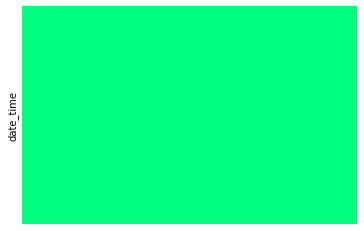

In [16]:
#plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,xticklabels=False,yticklabels=False,cmap='winter_r')

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

<Figure size 360x360 with 0 Axes>

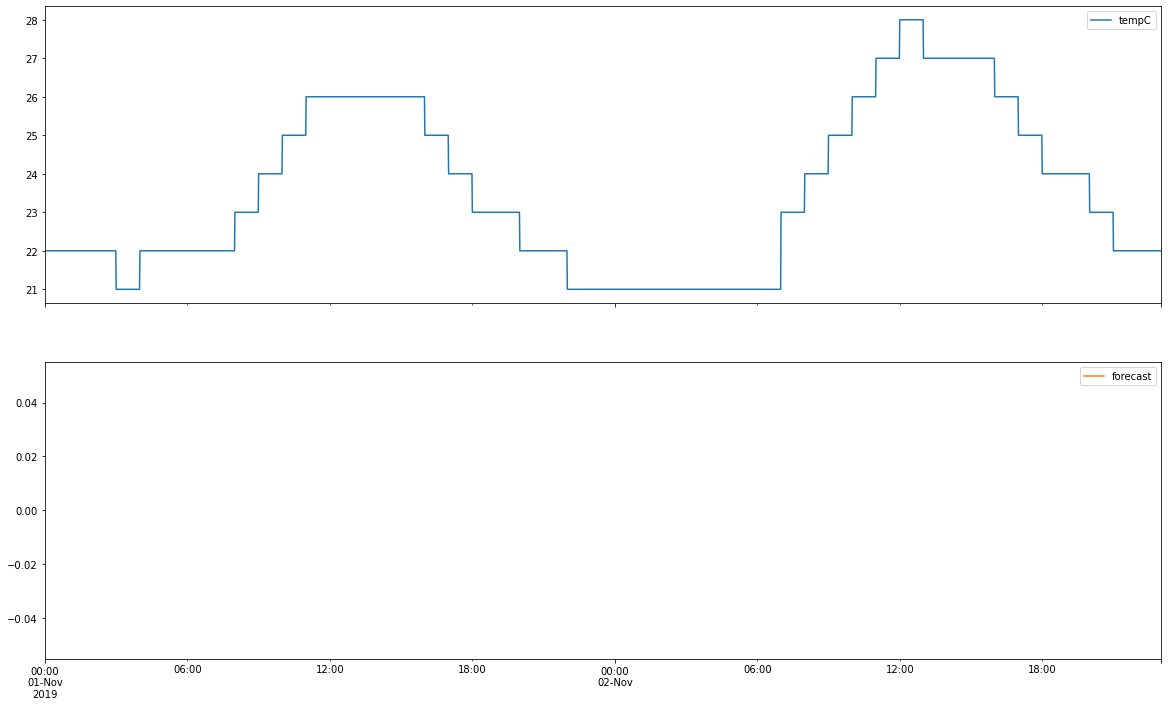

In [78]:
plt.figure(figsize=(5,5))
df['2019-11-01':'2019-11-02'].resample('T').fillna(method='pad').plot(subplots=True, figsize=(20,12))

<AxesSubplot:xlabel='date_time'>

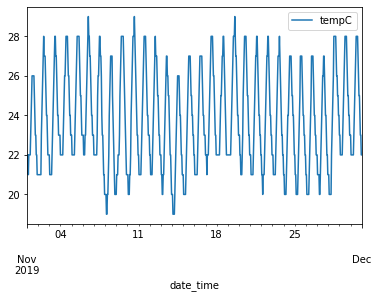

In [18]:
df.plot()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tempC'>

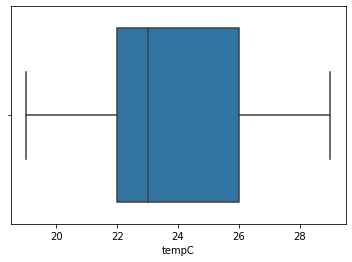

In [19]:
sns.boxplot(df.tempC)

In [20]:
def rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='ACTUAL MEAN')
    plt.plot(rolling_mean, label='ROLLING MEAN')
    plt.plot(rolling_std, label = 'ROLLING STD')
    plt.xlabel("DATE")
    plt.ylabel("MEAN TEMPERATURE")
    plt.title('ROLLING MEAN & STD ')
    plt.legend()
    plt.show()

def augmented_dickey_fuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','critical values']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    


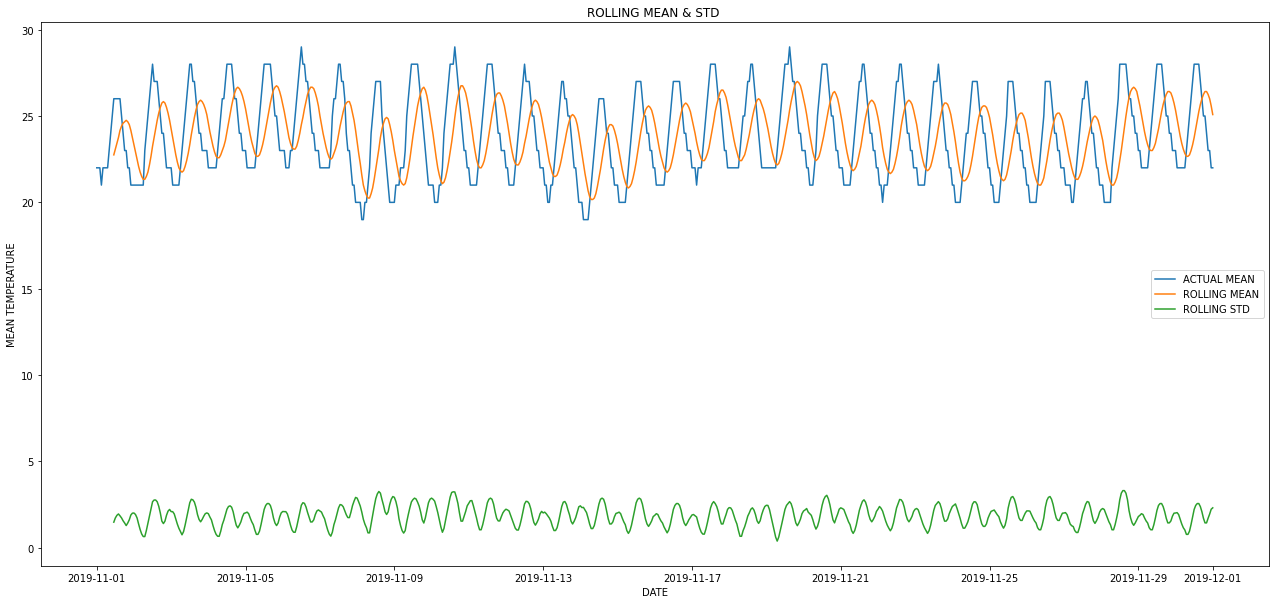

In [21]:
rolling_mean_std(df["tempC"])

In [22]:
augmented_dickey_fuller_test(df["tempC"])

ADF Test Statistic : -1.9708234989741402
p-value : 0.29951064392705873
#Lags Used : 19
Number of Observations Used : 701
critical values : {'1%': -3.4397129207385357, '5%': -2.8656718422599923, '10%': -2.568970295481694}
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Text(0.5, 0.98, '\nadditive Decompose')

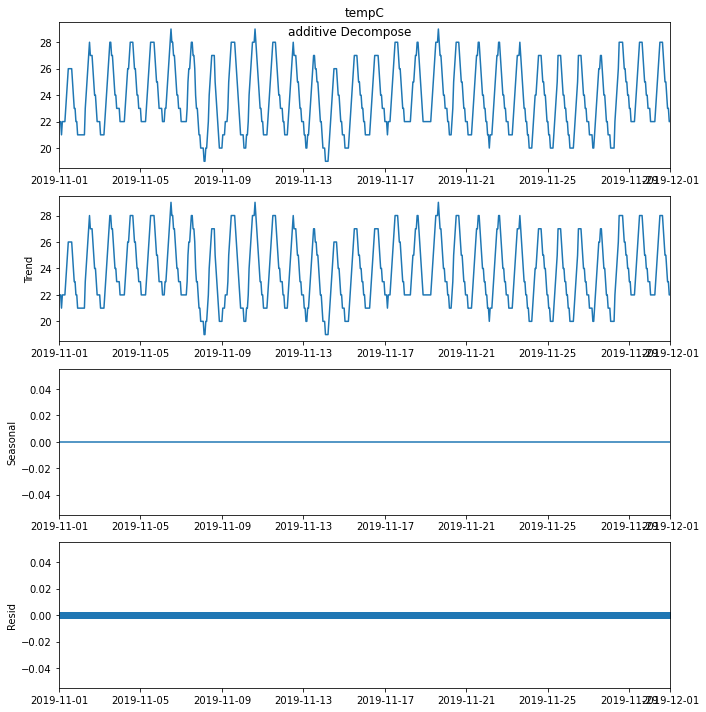

In [23]:
# additive Decomposition 
mul_result = seasonal_decompose(df['tempC'], model='additive',period=1)
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nadditive Decompose', fontsize=12)


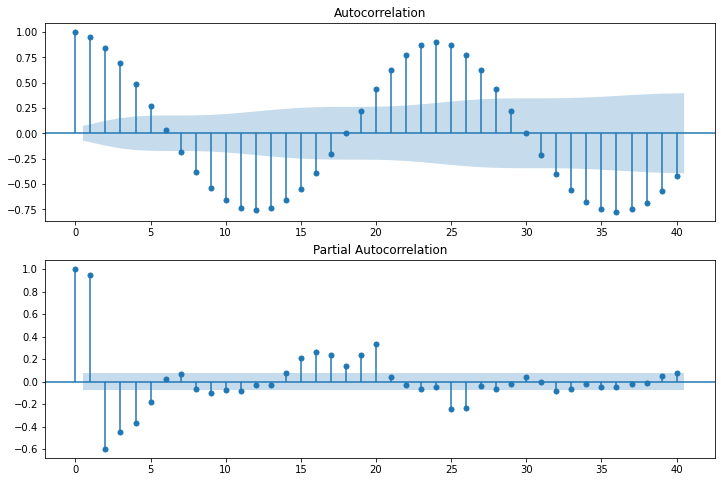

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['tempC'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['tempC'],lags=40,ax=ax2)

ADF Test Statistic : -1.9708234989741402
p-value : 0.29951064392705873
#Lags Used : 19
Number of Observations Used : 701
critical values : {'1%': -3.4397129207385357, '5%': -2.8656718422599923, '10%': -2.568970295481694}
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Figure size 144x360 with 0 Axes>

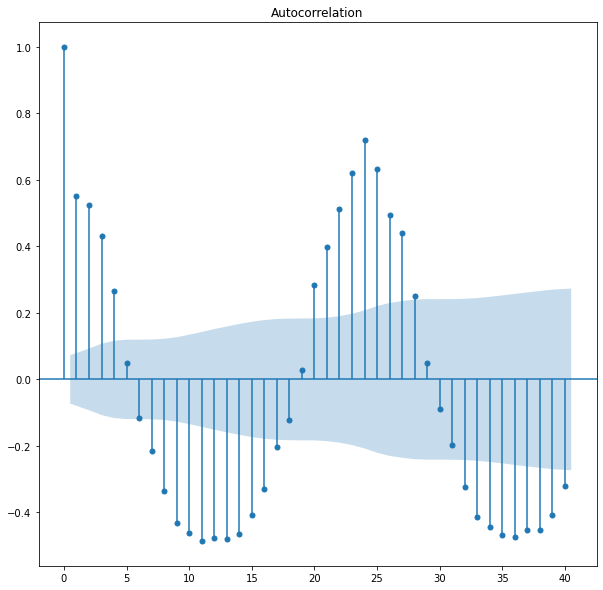

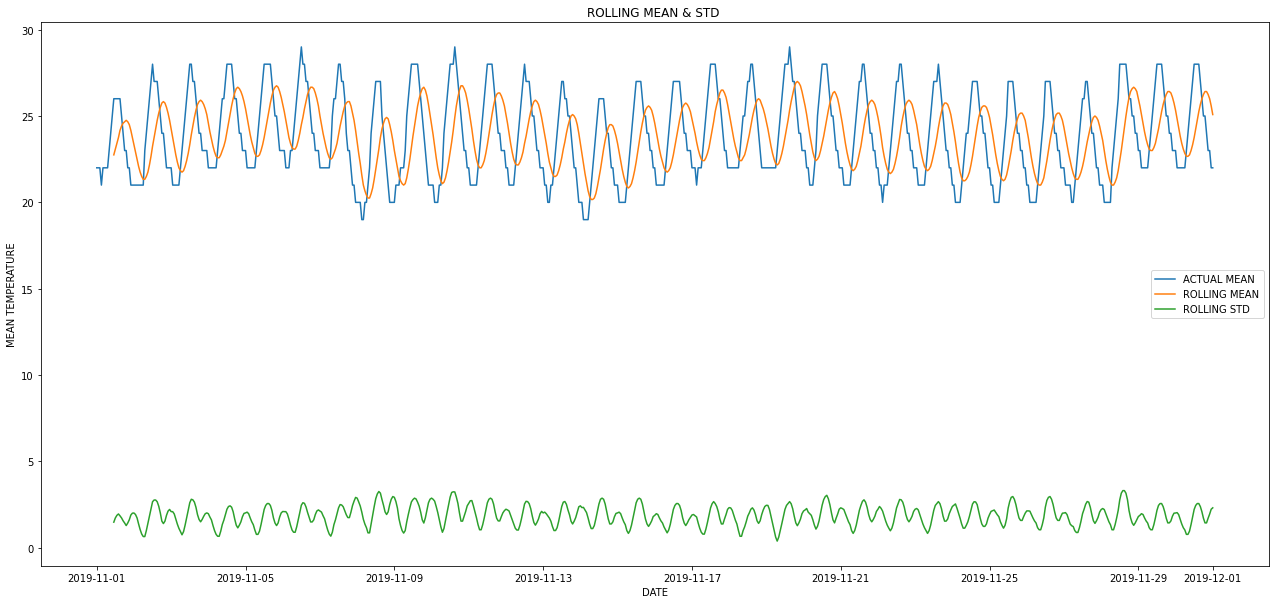

In [25]:

fig = plt.figure(figsize=(2,5))
fig = sm.graphics.tsa.plot_acf(df.diff().dropna().values,lags=40)
augmented_dickey_fuller_test(df["tempC"])
rolling_mean_std(df["tempC"])

ADF Test Statistic : -1.9708234989741402
p-value : 0.29951064392705873
#Lags Used : 19
Number of Observations Used : 701
critical values : {'1%': -3.4397129207385357, '5%': -2.8656718422599923, '10%': -2.568970295481694}
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Figure size 144x360 with 0 Axes>

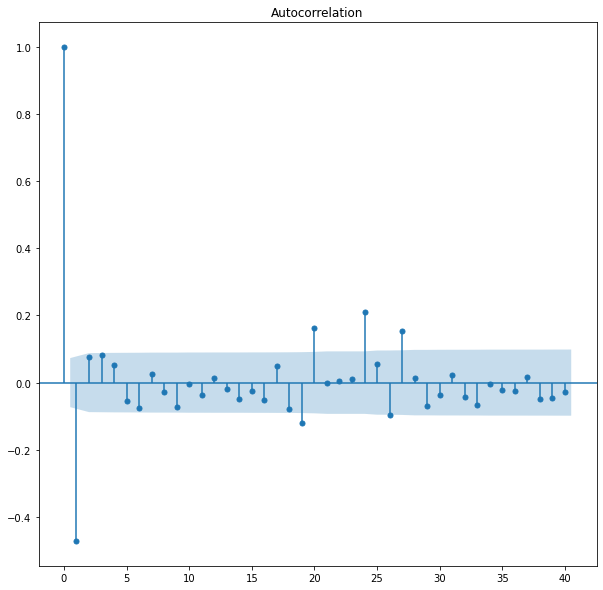

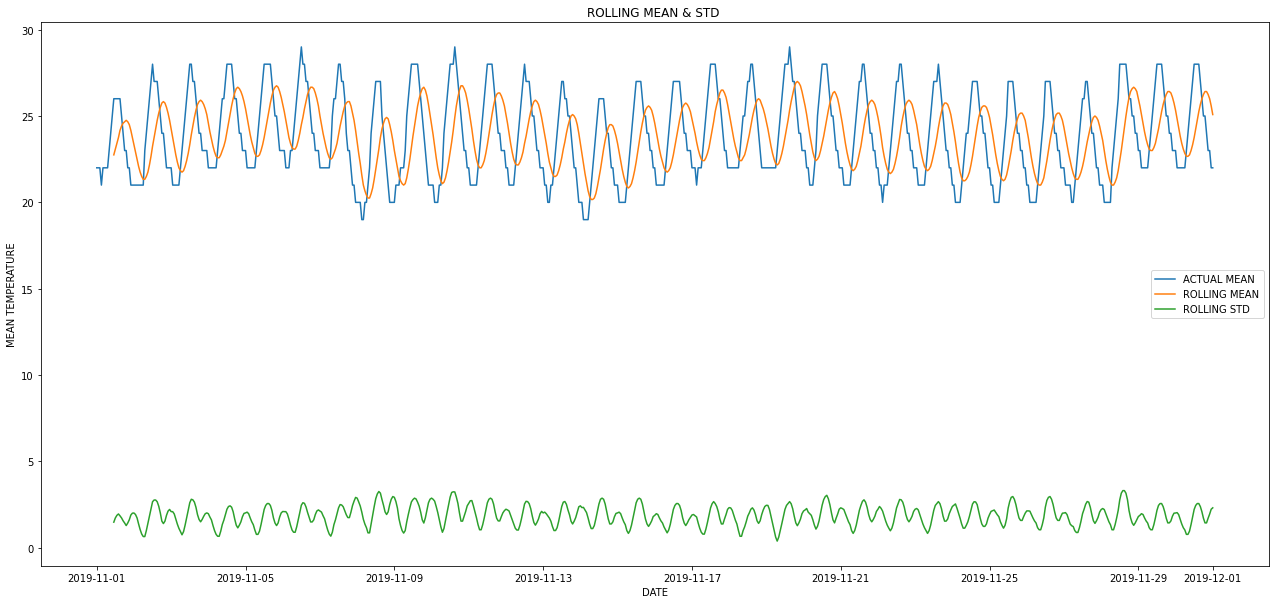

In [26]:
fig = plt.figure(figsize=(2,5))
fig = sm.graphics.tsa.plot_acf(df.diff().diff().dropna().values,lags=40)
augmented_dickey_fuller_test(df["tempC"])
rolling_mean_std(df["tempC"])

E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 144x360 with 0 Axes>

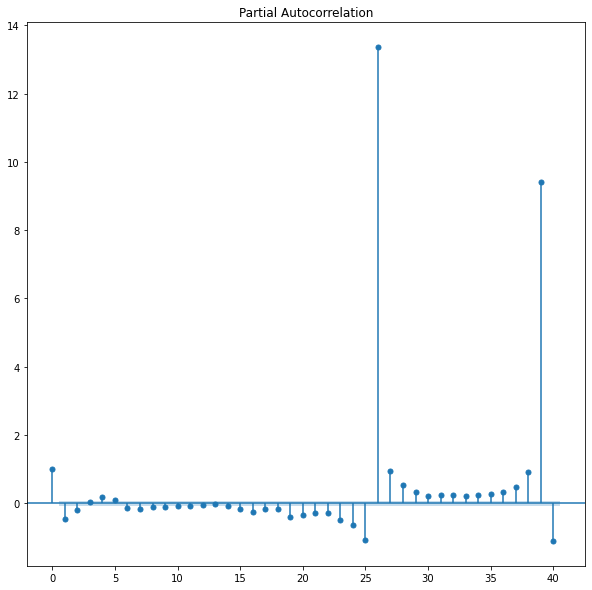

In [27]:
fig = plt.figure(figsize=(2,5))
fig = sm.graphics.tsa.plot_pacf(df.diff().diff().dropna().values,lags=40)


E:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


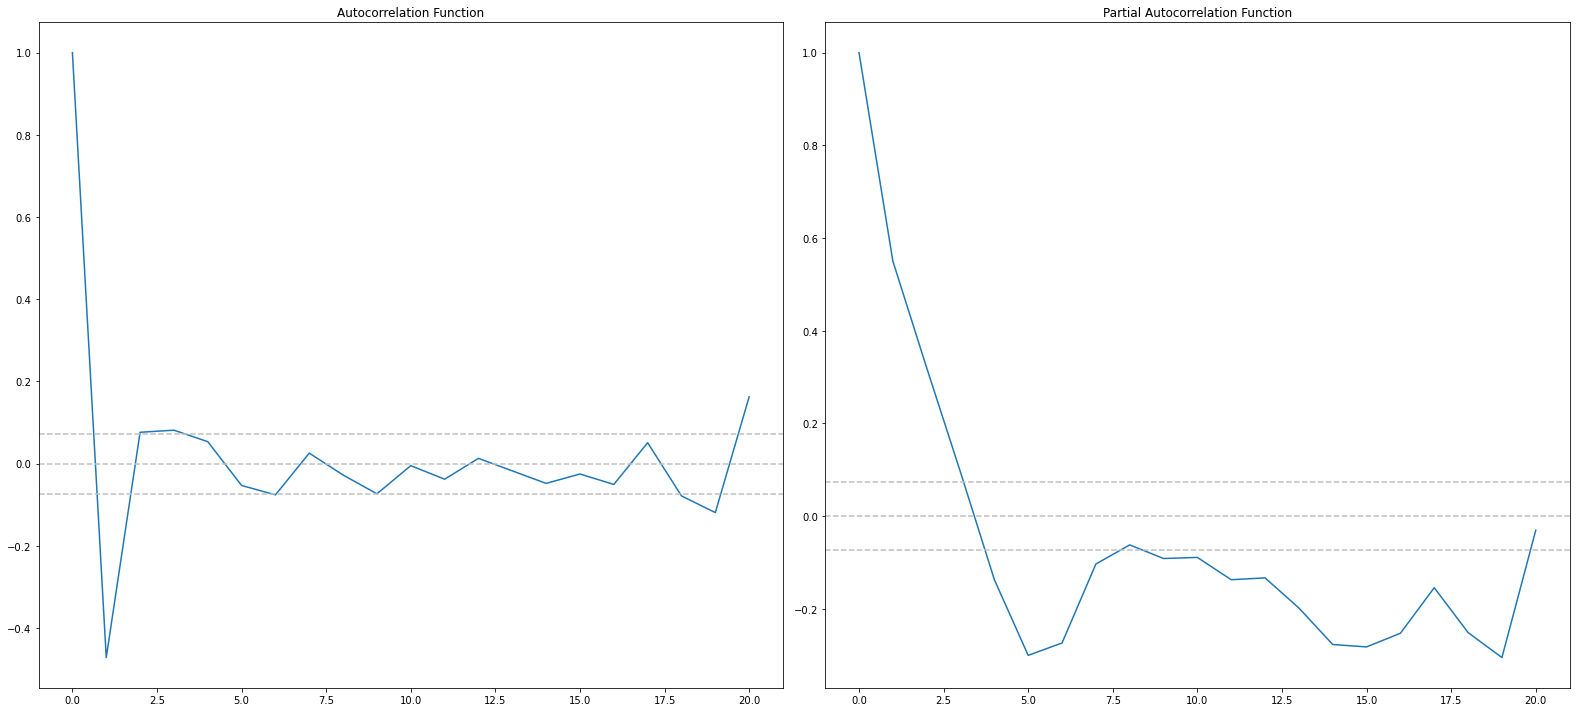

In [28]:
acf_lag = acf(df.diff().diff().dropna().values, nlags=20)
pacf_lag = pacf(df.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(df.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(df.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [29]:
from pmdarima import auto_arima

In [30]:
#creating our ARIMA Model

# Ignore harmless warnings

#Calling our model and generating best possible ARIMA combination,
#calling our function
stepwise_fit = auto_arima(df['tempC'],trace=True,suppress_warnings=True)           
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1110.915, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3357.779, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1677.518, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2574.375, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6629.318, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1437.870, Time=0.92 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1136.228, Time=1.52 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1148.347, Time=2.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1119.739, Time=2.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1521.596, Time=0.51 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1344.203, Time=0.93 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1115.974, Time=1.71 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1134.171, Time=2.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1330.284, Time=0.23 sec

Best model:  ARIMA(2,0,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  721
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -549.458
Date:                Fri, 22 Apr 2022   AIC                           1110.915
Time:                        18:23:52   BIC                           1138.399
Sample:                             0   HQIC                          1121.525
                                - 721                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6616      0.080     20.672      0.000       1.504       1.819
ar.L1          1.8811      0.013    140.519      0.000       1.855       1.907
ar.L2         -0.9508      0.013    -72.306      0.000      -0.977      -0.925
ma.L1         -0.8539      0.048    -17.939      0.000      -0.947      -0.761
ma.L2          0.2233      0.047      4.772      0.000       0.132       0.315
sigma2         0.2673      0.014     18.462      0.000       0.239       0.296
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.91   Prob(JB):                         0.93
Heteroskedasticity (H):               0.91   Skew:                             0.00
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model = ARIMA(df, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn

                              ARMA Model Results                              
Dep. Variable:                  tempC   No. Observations:                  721
Model:                     ARMA(2, 2)   Log Likelihood                -549.457
Method:                       css-mle   S.D. of innovations              0.517
Date:                Fri, 22 Apr 2022   AIC                           1110.913
Time:                        18:23:53   BIC                           1138.397
Sample:                    11-01-2019   HQIC                          1121.523
                         - 12-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          23.8467      0.103    232.271      0.000      23.645      24.048
ar.L1.tempC     1.8809      0.015    126.972      0.000       1.852       1.910
ar.L2.tempC    -0.9506      0.014    -69.088    

In [32]:
model_fit.aic

1110.9130797772173

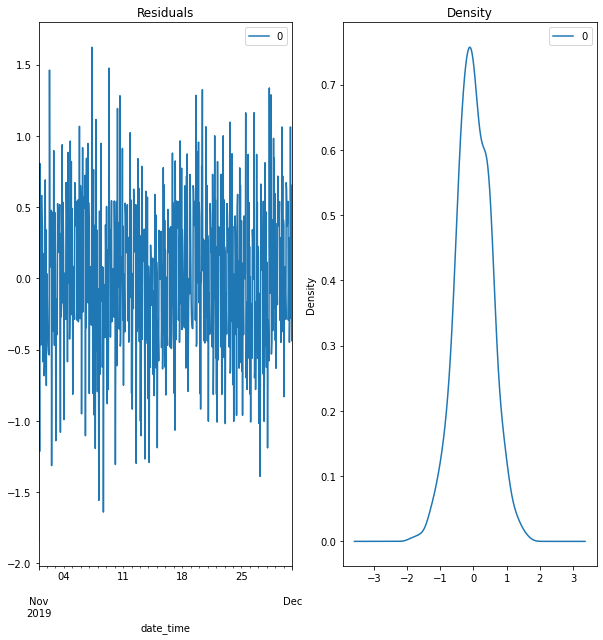

In [33]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [34]:
train=df[:-40]
test=df[-40:]
df.shape

(721, 1)

In [35]:
print(f"shape of train data {train.shape}")
print(f"shape of train data {test.shape}")

shape of train data (681, 1)
shape of train data (40, 1)


In [36]:
start=len(train)
end=len(train)+len(test)-1
print(start)
print(end)

681
720


In [37]:
df[720:]

,tempC
date_time,
2019-12-01,22


In [38]:
df.tail()

,tempC
date_time,
2019-11-30 20:00:00,24
2019-11-30 21:00:00,23
2019-11-30 22:00:00,23
2019-11-30 23:00:00,22
2019-12-01 00:00:00,22


<AxesSubplot:xlabel='date_time'>

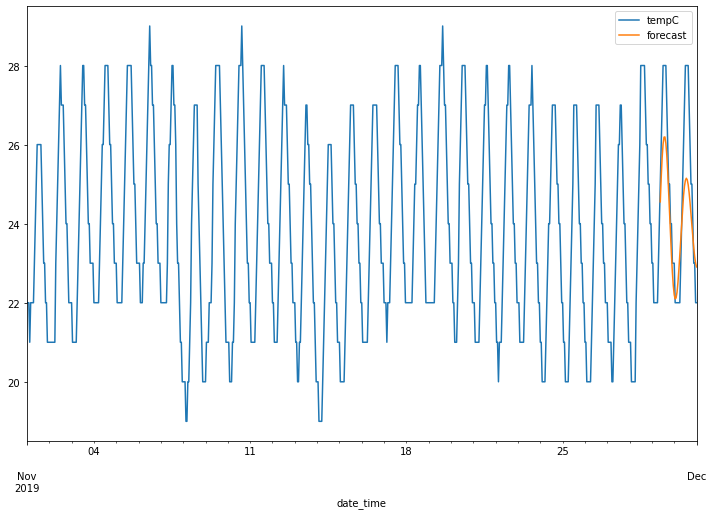

In [39]:
df['forecast']=model_fit.predict(start=start,end=end,dynamic=True)
df[['tempC','forecast']].plot(figsize=(12,8))

In [40]:
df.tail(50)

,tempC,forecast
date_time,,
2019-11-28 23:00:00,24,NaN
2019-11-29 00:00:00,23,NaN
2019-11-29 01:00:00,23,NaN
2019-11-29 02:00:00,22,NaN
2019-11-29 03:00:00,22,NaN
2019-11-29 04:00:00,22,NaN
2019-11-29 05:00:00,22,NaN
2019-11-29 06:00:00,22,NaN
2019-11-29 07:00:00,23,NaN


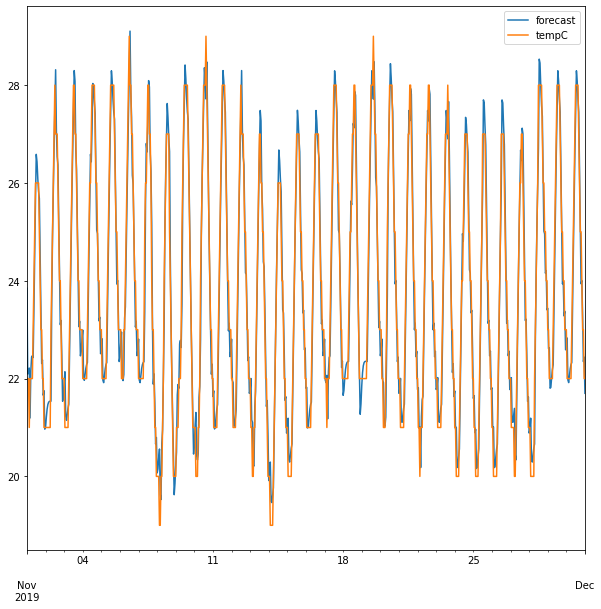

In [41]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [42]:
original=df[-40:].tempC

In [43]:
predicted=df[-40:].forecast

In [44]:
from sklearn import metrics

In [45]:
print(f"MEAN ABSOLUTE ERROR : {metrics.mean_absolute_error(original,predicted)}")
print(f"MEAN SQUARED ERROR : {metrics.mean_squared_error(original,predicted)}")
print(f"ROOT MEAN SQUARED ERROR : {np.sqrt(metrics.mean_squared_error(original,predicted))}")

MEAN ABSOLUTE ERROR : 1.083915066588641
MEAN SQUARED ERROR : 1.8875423734592047
ROOT MEAN SQUARED ERROR : 1.3738785875976103


In [46]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(hours=x)for x in range(1,6)]
future_dataset_new=pd.DataFrame(index=future_dates[0:],columns=df.columns)

In [47]:
future_dates

[Timestamp('2019-12-01 01:00:00'),
 Timestamp('2019-12-01 02:00:00'),
 Timestamp('2019-12-01 03:00:00'),
 Timestamp('2019-12-01 04:00:00'),
 Timestamp('2019-12-01 05:00:00')]

In [48]:
future_dataset_new

,tempC,forecast
2019-12-01 01:00:00,NaN,NaN
2019-12-01 02:00:00,NaN,NaN
2019-12-01 03:00:00,NaN,NaN
2019-12-01 04:00:00,NaN,NaN
2019-12-01 05:00:00,NaN,NaN


In [49]:
print(df.index[-1])

2019-12-01 00:00:00


In [50]:
df.tail()

,tempC,forecast
date_time,,
2019-11-30 20:00:00,24,23.646074
2019-11-30 21:00:00,23,23.380616
2019-11-30 22:00:00,23,23.160747
2019-11-30 23:00:00,22,22.999529
2019-12-01 00:00:00,22,22.905292


In [51]:
df=pd.concat([df,future_dataset_new])

In [52]:
df.tail(20)

,tempC,forecast
2019-11-30 10:00:00,26,24.709708
2019-11-30 11:00:00,27,24.946298
2019-11-30 12:00:00,28,25.094589
2019-11-30 13:00:00,28,25.148616
2019-11-30 14:00:00,28,25.109276
2019-11-30 15:00:00,28,24.983926
2019-11-30 16:00:00,27,24.785549
2019-11-30 17:00:00,26,24.531575
2019-11-30 18:00:00,25,24.242444
2019-11-30 19:00:00,25,23.940036


In [53]:
start=len(train)+len(test)
print(df.shape)
end=len(train)+len(test)+len(future_dataset_new)-1
print(f"start : {start} \n end : {end}")

(726, 2)
start : 721 
 end : 725


<AxesSubplot:>

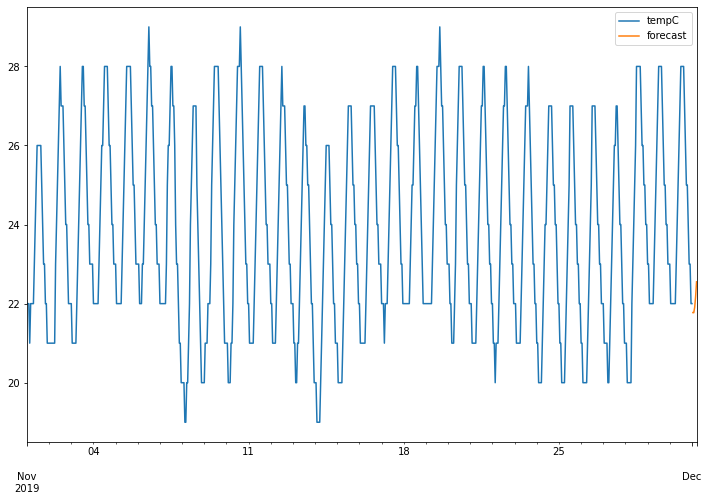

In [54]:
df['forecast'] = model_fit.predict(start =start , end =end , dynamic= True)
p= model_fit.predict(start =start , end =end , dynamic= True)

df[['tempC', 'forecast']].plot(figsize=(12, 8)) 

In [55]:
dat=str(p.index[0])

In [56]:
dat

'2019-12-01 01:00:00'

In [57]:
dat[10:]

' 01:00:00'

In [58]:
df.tail(50)

,tempC,forecast
2019-11-29 04:00:00,22,NaN
2019-11-29 05:00:00,22,NaN
2019-11-29 06:00:00,22,NaN
2019-11-29 07:00:00,23,NaN
2019-11-29 08:00:00,24,NaN
2019-11-29 09:00:00,25,NaN
2019-11-29 10:00:00,26,NaN
2019-11-29 11:00:00,27,NaN
2019-11-29 12:00:00,28,NaN
2019-11-29 13:00:00,28,NaN


In [59]:
val=-5

In [60]:
import re
def change_date(date):
    return re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})','\\3-\\2-\\1',date)

In [61]:
print(round(p[val],2))
print(round(p[val+1],2))
print(round(p[val+2],2))
print(round(p[val+3],2))
print(round(p[val+4],2))
print(str(p.index[val])[10:16])
print(str(p.index[val+1])[10:16])
print(str(p.index[val+2])[10:16])
print(str(p.index[val+3])[10:16])
print(str(p.index[val+4])[10:16])
d=str(p.index[val])[0:10]
print(change_date(d))


21.77
21.77
21.91
22.18
22.55
 01:00
 02:00
 03:00
 04:00
 05:00
01-12-2019


In [62]:
s="hello"

In [63]:
s[::-1]

'olleh'

In [64]:
df.iloc[len(df)-len(future_dataset_new)]

tempC             NaN
forecast    21.773425
Name: 2019-12-01 01:00:00, dtype: object

In [65]:
future_dates2=[df.index[-1]+ DateOffset(hours=x)for x in range(1,10)]
future_dataset_new2=pd.DataFrame(index=future_dates2[0:],columns=df.columns)
print(future_dates2)
print(future_dataset_new2)

df=pd.concat([df,future_dataset_new2])
print(df.tail(40))

[Timestamp('2019-12-01 06:00:00'), Timestamp('2019-12-01 07:00:00'), Timestamp('2019-12-01 08:00:00'), Timestamp('2019-12-01 09:00:00'), Timestamp('2019-12-01 10:00:00'), Timestamp('2019-12-01 11:00:00'), Timestamp('2019-12-01 12:00:00'), Timestamp('2019-12-01 13:00:00'), Timestamp('2019-12-01 14:00:00')]
                    tempC forecast
2019-12-01 06:00:00   NaN      NaN
2019-12-01 07:00:00   NaN      NaN
2019-12-01 08:00:00   NaN      NaN
2019-12-01 09:00:00   NaN      NaN
2019-12-01 10:00:00   NaN      NaN
2019-12-01 11:00:00   NaN      NaN
2019-12-01 12:00:00   NaN      NaN
2019-12-01 13:00:00   NaN      NaN
2019-12-01 14:00:00   NaN      NaN
                    tempC   forecast
2019-11-29 23:00:00    23        NaN
2019-11-30 00:00:00    23        NaN
2019-11-30 01:00:00    22        NaN
2019-11-30 02:00:00    22        NaN
2019-11-30 03:00:00    22        NaN
2019-11-30 04:00:00    22        NaN
2019-11-30 05:00:00    22        NaN
2019-11-30 06:00:00    22        NaN
2019-11-30

In [66]:
start2=future_dataset_new.index[0]
end2=future_dataset_new2.index[-1]
print(start2)
print(end2)

2019-12-01 01:00:00
2019-12-01 14:00:00


<AxesSubplot:>

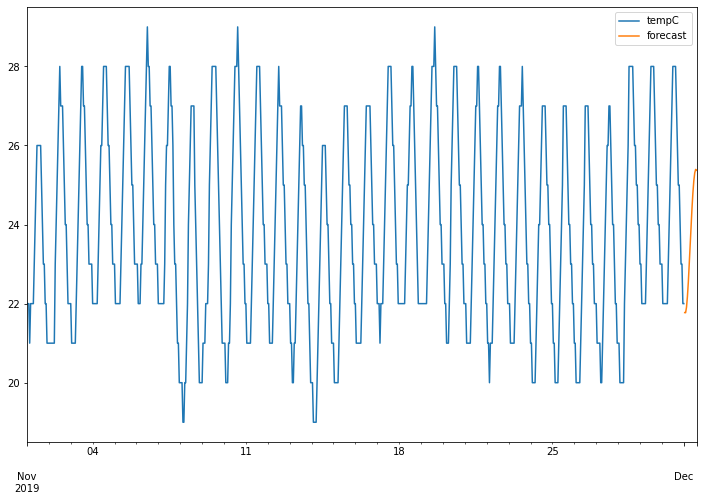

In [67]:
df['forecast'] = model_fit.predict(start = start2, end = end2, dynamic= True)
df[['tempC', 'forecast']].plot(figsize=(12, 8)) 

In [68]:
df.tail(50)

,tempC,forecast
2019-11-29 13:00:00,28,NaN
2019-11-29 14:00:00,28,NaN
2019-11-29 15:00:00,28,NaN
2019-11-29 16:00:00,27,NaN
2019-11-29 17:00:00,26,NaN
2019-11-29 18:00:00,25,NaN
2019-11-29 19:00:00,25,NaN
2019-11-29 20:00:00,24,NaN
2019-11-29 21:00:00,24,NaN
2019-11-29 22:00:00,23,NaN


In [69]:
df.iloc[len(df)-len(future_dataset_new2)]

tempC             NaN
forecast    22.995906
Name: 2019-12-01 06:00:00, dtype: object

In [70]:
future_dates3=[df.index[-1]+ DateOffset(hours=x)for x in range(1,10)]
future_dataset_new3=pd.DataFrame(index=future_dates3[0:],columns=df.columns)
print(future_dates3)
print(future_dataset_new3)

df=pd.concat([df,future_dataset_new3])
print(df.tail(40))

[Timestamp('2019-12-01 15:00:00'), Timestamp('2019-12-01 16:00:00'), Timestamp('2019-12-01 17:00:00'), Timestamp('2019-12-01 18:00:00'), Timestamp('2019-12-01 19:00:00'), Timestamp('2019-12-01 20:00:00'), Timestamp('2019-12-01 21:00:00'), Timestamp('2019-12-01 22:00:00'), Timestamp('2019-12-01 23:00:00')]
                    tempC forecast
2019-12-01 15:00:00   NaN      NaN
2019-12-01 16:00:00   NaN      NaN
2019-12-01 17:00:00   NaN      NaN
2019-12-01 18:00:00   NaN      NaN
2019-12-01 19:00:00   NaN      NaN
2019-12-01 20:00:00   NaN      NaN
2019-12-01 21:00:00   NaN      NaN
2019-12-01 22:00:00   NaN      NaN
2019-12-01 23:00:00   NaN      NaN
                    tempC   forecast
2019-11-30 08:00:00    24        NaN
2019-11-30 09:00:00    25        NaN
2019-11-30 10:00:00    26        NaN
2019-11-30 11:00:00    27        NaN
2019-11-30 12:00:00    28        NaN
2019-11-30 13:00:00    28        NaN
2019-11-30 14:00:00    28        NaN
2019-11-30 15:00:00    28        NaN
2019-11-30

In [71]:
start3=future_dataset_new.index[0]
end3=future_dataset_new3.index[-1]
print(start3)
print(end3)

2019-12-01 01:00:00
2019-12-01 23:00:00


<AxesSubplot:>

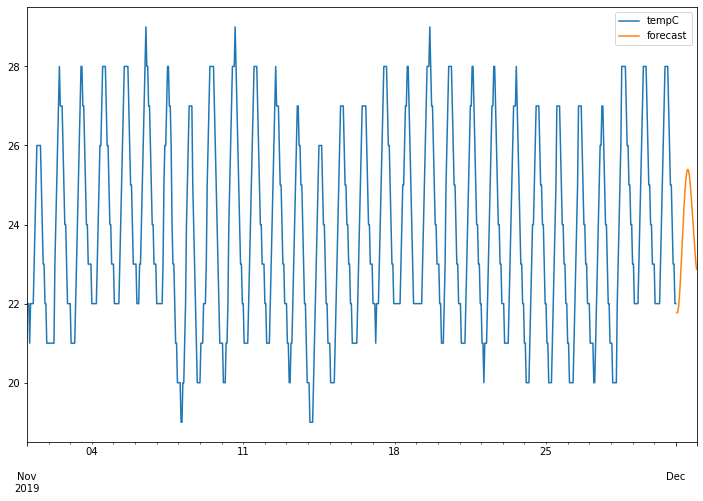

In [72]:
df['forecast'] = model_fit.predict(start = start3, end = end3, dynamic= True)
p=model_fit.predict(start = start3, end = end3, dynamic= True)
df[['tempC', 'forecast']].plot(figsize=(12, 8)) 

In [73]:
df.tail(50)

,tempC,forecast
2019-11-29 22:00:00,23,NaN
2019-11-29 23:00:00,23,NaN
2019-11-30 00:00:00,23,NaN
2019-11-30 01:00:00,22,NaN
2019-11-30 02:00:00,22,NaN
2019-11-30 03:00:00,22,NaN
2019-11-30 04:00:00,22,NaN
2019-11-30 05:00:00,22,NaN
2019-11-30 06:00:00,22,NaN
2019-11-30 07:00:00,23,NaN


<AxesSubplot:>

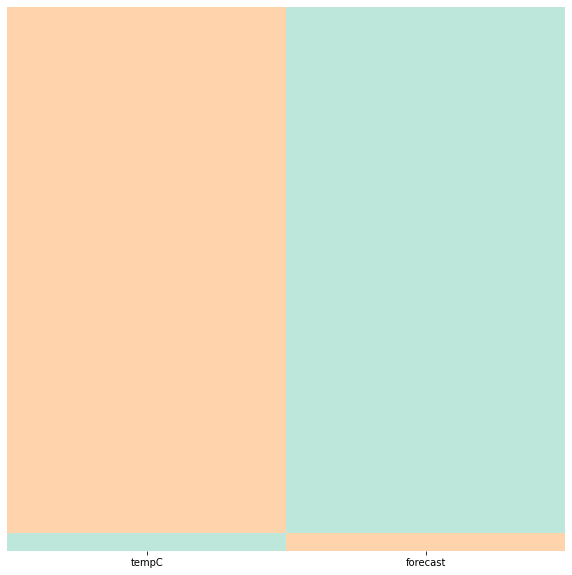

In [74]:
sns.heatmap(df.isnull(),cbar=False,xticklabels=True,yticklabels=False,cmap="icefire_r")

In [75]:
import pickle

In [76]:
file=open("Nov2k19.pkl","wb")
pickle.dump(model_fit,file)